In [45]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 29.8 MB/s 
     |████████████████████████████████| 596 kB 37.8 MB/s 
     |████████████████████████████████| 61 kB 362 kB/s 
     |████████████████████████████████| 3.3 MB 46.8 MB/s 
     |████████████████████████████████| 895 kB 53.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**Basic Library's**

In [59]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import transformers
import tqdm
from keras.preprocessing import sequence

from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud,STOPWORDS

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

**Dataset**

In [65]:
train = pd.read_csv("/content/dreaddit-train.csv")
test = pd.read_csv("/content/dreaddit-test.csv")

**EDA Process**

In [7]:
print(train.columns)
print(train.shape)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(2838, 116)


In [8]:
print(test.columns)
print(test.shape)

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(715, 116)


In [9]:
splt_col_train=train.select_dtypes(include='object')
print('categorical_Variables are: ',splt_col_train.columns)

splt_col_test=test.select_dtypes(include='object')
print('categorical_Variables are: ',splt_col_test.columns)

categorical_Variables are:  Index(['subreddit', 'post_id', 'sentence_range', 'text'], dtype='object')
categorical_Variables are:  Index(['subreddit', 'post_id', 'sentence_range', 'text'], dtype='object')


In [10]:
print(train.subreddit.value_counts())
print("____________________________")
print(test.subreddit.value_counts())

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64
____________________________
anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: subreddit, dtype: int64


In [66]:
train = train.drop(['post_id', 'sentence_range', 'id'], axis = 1)
test = test.drop(['post_id', 'sentence_range', 'id'], axis = 1)

In [67]:
mydata = pd.concat([train,test],axis=0,ignore_index=True)
mydata = mydata.sample(frac = 1).reset_index(drop = True)
mydata.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,...,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,anxiety,I seem to have these bouts of anxiety. I'm not...,1,0.8,1.539557e+09,1,1.366702,64,7.54,1.00,99.00,1.00,12.8,17.19,96.88,62.50,26.56,14.06,14.06,0.00,0.0,0.00,0.0,12.50,3.12,12.50,12.50,7.81,6.25,3.12,25.00,7.81,4.69,1.56,0.00,1.56,10.94,1.56,9.38,7.81,...,3.12,3.12,6.25,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,14.06,7.81,0.00,0.0,0.0,0.0,0.0,0.00,0.0,6.25,0.00,0.00,2.7500,2.8000,3.0,1.0,1.1429,1.0,1.76472,1.37288,1.82323,1.00,0,2.948571,-0.113021
1,ptsd,I was recently diagnosed with PTSD (theoretica...,1,0.8,1.500187e+09,7,5.627714,101,19.24,2.43,99.00,1.00,20.2,20.79,93.07,62.38,24.75,12.87,12.87,0.00,0.0,0.00,0.0,11.88,3.96,16.83,10.89,4.95,9.90,2.97,13.86,7.92,4.95,3.96,1.98,0.00,8.91,0.99,7.92,1.98,...,1.98,5.94,7.92,1.98,0.00,0.0,0.00,0.0,0.00,1.98,0.99,0.0,0.0,0.99,0.0,17.82,4.95,2.97,0.0,0.0,0.0,0.0,0.99,0.0,3.96,3.96,0.99,3.0000,3.0000,3.0,1.0,1.1250,1.0,1.73781,1.48837,1.85366,1.00,8,7.004762,-0.144000
2,almosthomeless,As is usually the case with the stories I read...,1,0.8,1.489344e+09,14,4.154362,89,74.60,50.00,94.01,25.77,17.8,8.99,87.64,57.30,13.48,11.24,8.99,2.25,0.0,0.00,0.0,2.25,12.36,14.61,8.99,6.74,8.99,0.00,20.22,4.49,3.37,1.12,2.25,2.25,0.00,0.00,0.00,0.00,...,0.00,10.11,8.99,2.25,1.12,0.0,2.25,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,23.60,5.62,6.74,0.0,0.0,0.0,0.0,0.00,0.0,4.49,6.74,0.00,2.8000,2.7273,3.0,1.0,1.0000,1.0,1.65804,1.66761,1.82156,0.94,16,5.299447,-0.143611
3,survivorsofabuse,The next day I called M and told him what happ...,0,0.8,1.505153e+09,9,5.577529,82,9.30,68.71,40.20,1.00,16.4,13.41,93.90,64.63,29.27,15.85,7.32,0.00,0.0,8.54,0.0,13.41,3.66,12.20,8.54,3.66,10.98,2.44,21.95,3.66,2.44,2.44,1.22,2.44,7.32,1.22,6.10,0.00,...,1.22,2.44,8.54,0.00,0.00,0.0,0.00,0.0,0.00,1.22,0.00,0.0,0.0,0.00,0.0,12.20,6.10,0.00,0.0,0.0,0.0,0.0,0.00,0.0,6.10,0.00,0.00,2.9167,2.8571,3.0,1.0,1.2500,1.0,1.72950,1.46286,1.80801,1.00,6,5.616471,-0.208333
4,anxiety,"My best friend died last year, of a rare type ...",1,0.6,1.541358e+09,12,3.863676,68,49.75,11.97,99.00,8.31,13.6,17.65,97.06,60.29,16.18,13.24,10.29,0.00,0.0,2.94,0.0,1.47,7.35,14.71,10.29,8.82,5.88,1.47,17.65,10.29,5.88,0.00,1.47,0.00,4.41,1.47,2.94,1.47,...,1.47,4.41,19.12,2.94,0.00,0.0,0.00,0.0,2.94,0.00,0.00,0.0,0.0,0.00,0.0,11.76,7.35,4.41,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,3.0000,2.5000,2.8,1.0,1.0000,1.0,1.71758,1.64333,1.89395,0.94,3,4.290471,0.109722


**Visualization**

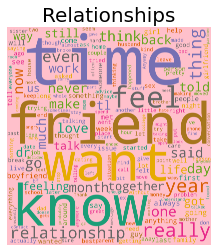

In [68]:
subset = mydata[mydata['subreddit']=='relationships']
text = subset.text.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=4500,height=4800
                       ).generate(" ".join(text))

plt.axis('off')
plt.title("Relationships",fontsize=20)
plt.imshow(cloud1)

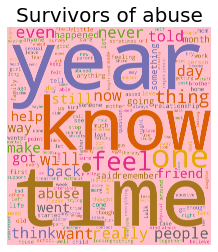

In [15]:
subset = mydata[mydata['subreddit']=='survivorsofabuse']
text = subset.text.values
cloud2=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=4500,height=4800
                       ).generate(" ".join(text))
plt.axis('off')
plt.title("Survivors of abuse",fontsize=20)
plt.imshow(cloud2)

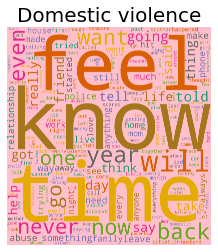

In [16]:
subset = mydata[mydata['subreddit']=='domesticviolence']
text = subset.text.values
cloud3=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=4500,height=4800
                       ).generate(" ".join(text))
plt.axis('off')
plt.title("Domestic violence",fontsize=20)
plt.imshow(cloud3)

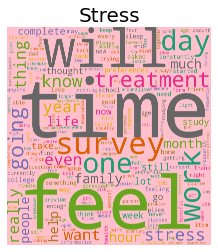

In [17]:
subset = mydata[mydata['subreddit']=='stress']
text = subset.text.values
cloud4=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=4500,height=4800
                       ).generate(" ".join(text))
plt.axis('off')
plt.title("Stress",fontsize=20)
plt.imshow(cloud4)

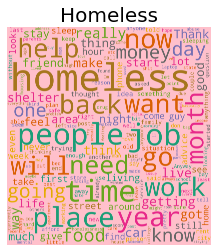

In [18]:
subset = mydata[mydata['subreddit']=='homeless']
text = subset.text.values
cloud5=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=4500,height=4800
                       ).generate(" ".join(text))
plt.axis('off')
plt.title("Homeless",fontsize=20)
plt.imshow(cloud5)

In [43]:
mydata.corr().abs()['label'].sort_values(ascending = False)[:30]

label                       1.000000
lex_liwc_Tone               0.450479
lex_liwc_negemo             0.394988
lex_liwc_Clout              0.392516
lex_liwc_i                  0.387434
sentiment                   0.307780
lex_dal_min_pleasantness    0.290220
lex_liwc_posemo             0.288324
lex_liwc_anx                0.271179
lex_liwc_Authentic          0.266833
lex_liwc_social             0.245331
lex_liwc_Analytic           0.233978
lex_liwc_function           0.227150
lex_liwc_Dic                0.227076
lex_liwc_anger              0.217469
lex_liwc_you                0.211981
lex_liwc_feel               0.203389
lex_liwc_sad                0.202216
lex_liwc_affiliation        0.184311
lex_liwc_ppron              0.178081
lex_liwc_negate             0.177613
lex_liwc_Apostro            0.172879
lex_liwc_risk               0.172531
lex_liwc_pronoun            0.171689
lex_dal_avg_pleasantness    0.170962
lex_liwc_focuspresent       0.169931
lex_liwc_swear              0.165632
l

**Label Encoder**

In [63]:
le = LabelEncoder()
mydata['subreddit'] = le.fit_transform(mydata['subreddit'])

**Tokenizer Process**

In [46]:
#creating a function
def func_tokenizer(tokenizer_name, docs):
    features = []
    for doc in tqdm.tqdm(docs, desc = 'converting documents to features'):
        tokens = tokenizer_name.tokenize(doc)
        ids = tokenizer_name.convert_tokens_to_ids(tokens)
        features.append(ids)
    return features
print("The function is created successfully")

The function is created successfully


In [47]:
bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased')

X,y = mydata[['text', 'lex_liwc_Tone', 'lex_liwc_negemo', 'lex_liwc_Clout','lex_liwc_i', 'sentiment' ]], mydata['label']
bert_features = func_tokenizer(bert_tokenizer, X['text'])

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

converting documents to features: 100%|██████████| 3553/3553 [00:15<00:00, 230.77it/s]


In [48]:
bert_trg = sequence.pad_sequences(bert_features, maxlen = 500)

In [50]:
X = pd.DataFrame(bert_trg)

X = X.assign(lex_liwc_negemo = mydata['lex_liwc_negemo'].values)
X = X.assign(lex_liwc_Tone= mydata['lex_liwc_Tone'].values)
X = X.assign(lex_liwc_Clout = mydata['lex_liwc_Clout'].values)
X = X.assign(lex_liwc_i = mydata['lex_liwc_i'].values)
X = X.assign(sentiment = mydata['sentiment'].values)
X = X.assign(lex_dal_min_pleasantness = mydata['lex_dal_min_pleasantness'].values)
X = X.assign(lex_liwc_posemo = mydata['lex_liwc_posemo'].values)
X = X.assign(lex_liwc_anx = mydata['lex_liwc_anx'].values)
X = X.assign(lex_liwc_Authentic = mydata['lex_liwc_Authentic'].values)
X = X.assign(lex_liwc_social = mydata['lex_liwc_social'].values)
X = X.assign(lex_liwc_Analytic = mydata['lex_liwc_Analytic'].values)
X = X.assign(lex_liwc_function = mydata['lex_liwc_function'].values)
X = X.assign(lex_liwc_Dic = mydata['lex_liwc_Dic'].values)

**Model Build Using Pipelines**

In [56]:
def get_models():
    
    models = dict()
    models['model_lr'] = make_pipeline(StandardScaler(),LogisticRegression(solver = 'saga', C = 70.0))
    models['model_knn'] = make_pipeline(StandardScaler(),KNeighborsClassifier())
    models['model_dt'] = DecisionTreeClassifier(max_depth = 1)
    models['model_svm'] = make_pipeline(StandardScaler(),SVC())
    models['model_rf'] = RandomForestClassifier(n_estimators = 10)
    
    return models

**Model Evaluate using pipelines**

In [57]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>model_lr 0.76 (0.02)
>model_knn 0.65 (0.02)
>model_dt 0.74 (0.02)
>model_svm 0.76 (0.02)
>model_rf 0.69 (0.03)


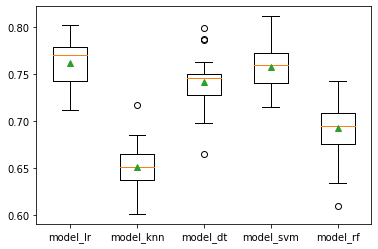

In [58]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.2f (%.2f)' % (name, scores.mean(), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Conclusion :**

* In this Project, we built a Multi models that could approximately Stress Analysis in Social Media given some information about the population.
* Looking the above models that could give us a Model Accuracy are,

* Logistic Regression: 76%
* KNN: 65%
* Decision Tree: 74%
* Random Forest: 69%
* SVM: 76%